<a href="https://colab.research.google.com/github/divya2648/cs480student/blob/main/04/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

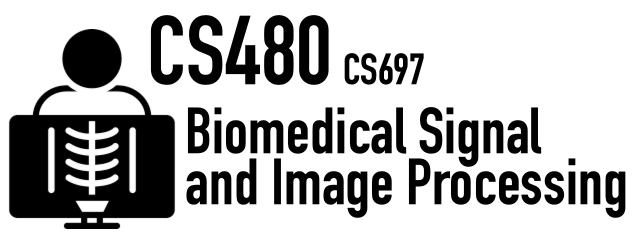
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.5 MB/s 


In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

The image dimensions are:  (1858, 2090)


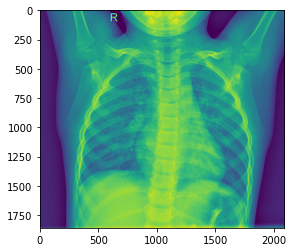

In [ ]:
# TODO: YOUR CODE
imshow(img)
print('The image dimensions are: ', img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)
for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.


TODO: Operation 1) The code blocks would resize all the greyscaled images in the array to confirm to the dimensions 300x300

TODO: Operation 2) The images that are smaller than 300x300 are padded

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

First 5 Normal Images


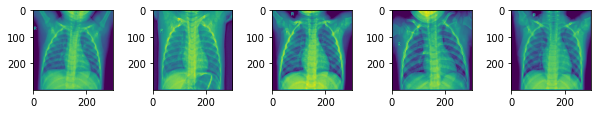

In [ ]:
print('First 5 Normal Images')
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(normal_images[i])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

First 5 Pnemonial Images


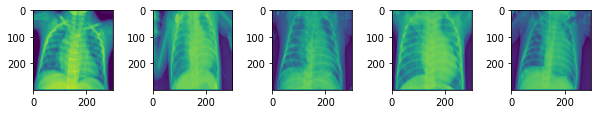

In [ ]:
print('First 5 Pnemonial Images')
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(pneumonia_images[i])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = [0]*TRAINING_COUNT
training_target.extend([1]*TRAINING_COUNT)
print(training_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = [0]*TESTING_COUNT
testing_target.extend([1]*TESTING_COUNT)
print(testing_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO

**Decision Tree Example** 

Decision tree is a map of all the possible outcomes with various permutations and combination sets of related features based on costs, probabilities and benefits

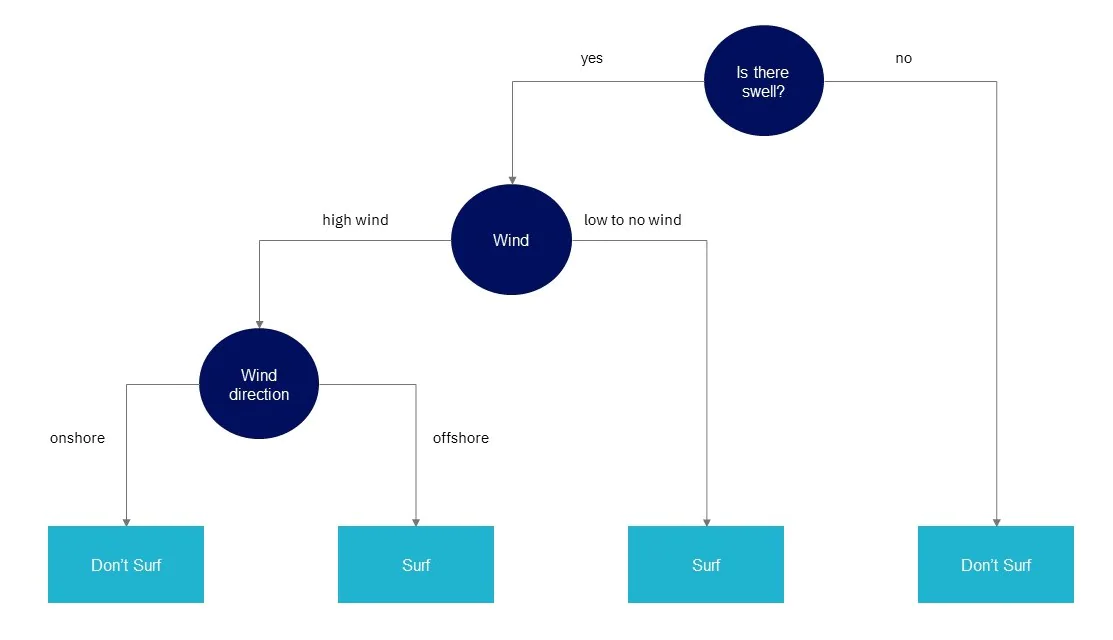






# Random forest combines the output of multiple decision trees
-Random forest algorithm randomly selects a subset of features and randomly sample from the dataset with replacement to create uncorrelated forest of trees.

-This process is known as Bagging and Feature Randomness

-As it combines the output of multiple Decision trees, the resulting outcome is more accurate than a single decision tree obtained using the entire dataset.

-Also, each individual decision tree has a prdiction vote and the outcome that has the maximum number of votes becomes the outcome of the entire dataset.

#References:

https://www.ibm.com/cloud/learn/random-forest

https://towardsdatascience.com/understanding-random-forest-58381e0602d2


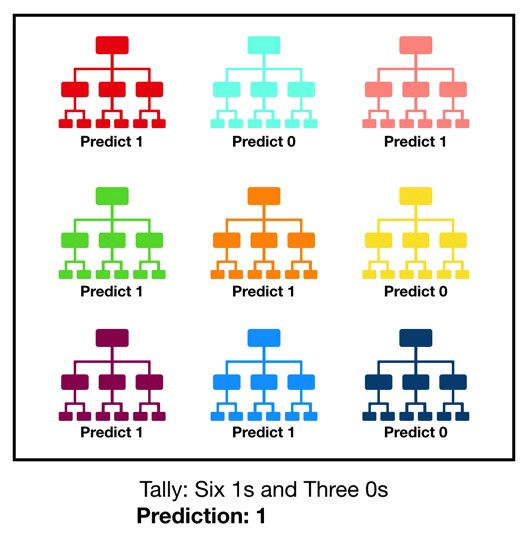

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

-I ran the classifier multiple times and the accuracy was in the range 83% to 90%.

-The accuracy of any classfication algorithm is considered good when the accuracy is above 90%.
 
-I am not surprised by the accuracy as the training dataset is small.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

Misclassified Normal Images and their corresponding Pnemonial Images


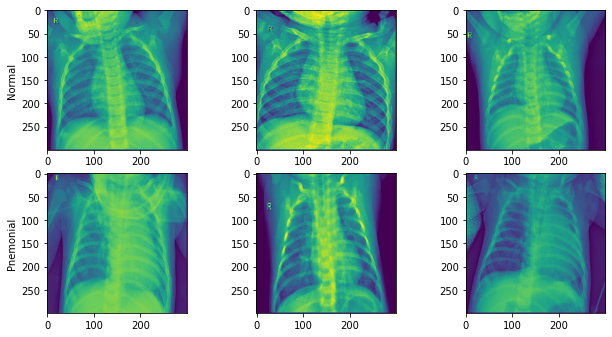

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER
misclassified_normal_images = []
misclassified_pneumonia_images = []
predictions = clf.predict(testing_data)
for i in range(len(predictions)):
  if predictions[i] != testing_target[i]:
    if i<=40:
      misclassified_normal_images.append(i+60)
    else:
      misclassified_pneumonia_images.append(i+20)

print('Misclassified Normal Images and their corresponding Pnemonial Images')
fig = plt.figure(figsize=(10,10))
for i in range(len(misclassified_normal_images)):
  ax_normal = fig.add_subplot(1,len(misclassified_normal_images),i+1)
  plt.imshow(normal_images[misclassified_normal_images[i]])
  ax_pnemonial = fig.add_subplot(2,len(misclassified_normal_images),i+1+len(misclassified_normal_images))
  plt.imshow(pneumonia_images[misclassified_normal_images[i]])
  if i==0:
    ax_normal.set_ylabel("Normal")
    ax_pnemonial.set_ylabel("Pnemonial")
fig.subplots_adjust(wspace=0.5, hspace=0.5)
  

Misclassified Pnemonial Images and their corresponding Normal Images


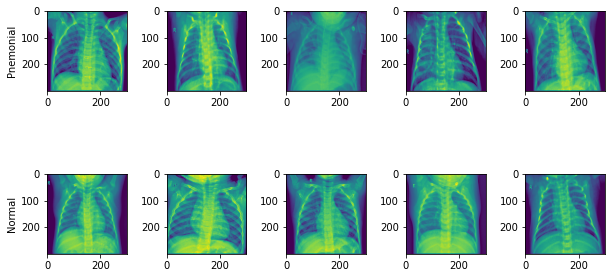

In [ ]:
print('Misclassified Pnemonial Images and their corresponding Normal Images')
fig = plt.figure(figsize=(10,10))
for i in range(len(misclassified_pneumonia_images)):
  ax_pnemonial = fig.add_subplot(1,len(misclassified_pneumonia_images),i+1)
  plt.imshow(pneumonia_images[misclassified_pneumonia_images[i]])
  ax_normal =  fig.add_subplot(2,len(misclassified_pneumonia_images),i+1+len(misclassified_pneumonia_images))
  plt.imshow(normal_images[misclassified_pneumonia_images[i]])
  if i==0:
    ax_normal.set_ylabel("Normal")
    ax_pnemonial.set_ylabel("Pnemonial")
fig.subplots_adjust(wspace=0.5, hspace=0.5)

By looking at the images, it is difficult to predict why these images were wrongly classified. The randomly extracted features could have values that facilitated the misclassification.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: The classification performance can be improved by using a bigger dataset and training the system with more data. 
# It would also be helpful to remove missing and outlier values.
# Algorithm tuning could contirbute to improve performance
# we can also specify the maximum or the minimum number of features, or increase or decrease the number of estimators.

In [ ]:
# Algorithm tuning & increasing the training data

TRAINING_COUNT = 80

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()
training_target = [0]*TRAINING_COUNT
training_target.extend([1]*TRAINING_COUNT)

TESTING_COUNT = 20

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()
testing_target = [0]*TESTING_COUNT
testing_target.extend([1]*TESTING_COUNT)


clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,min_samples_split=7, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)
fitted = clf.fit( training_data, training_target )
clf.score( testing_data, testing_target )

0.95

Increasing the training data and tuning the algorithm increased the accuracy to 95%

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw